In [3]:
##Assignments for Week-03

In [2]:
import pandas as pd

In [3]:
content=pd.read_csv('train.csv')

In [4]:
content.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [5]:
age_content=content[['Age','Fare']]

In [20]:
age_with_fares=content[(content['Age']>22)&(content['Fare']<400)&(content['Fare']>130)]

In [21]:
sub_fare=age_with_fares['Fare'].tolist()

In [22]:
sub_age=age_with_fares['Age'].tolist()

In [14]:
import matplotlib.pyplot as plt

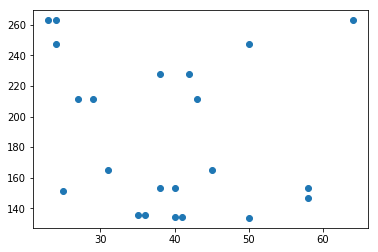

In [23]:
plt.scatter(sub_age,sub_fare)

In [10]:
def func(age,k,b):return k*age+b

In [16]:
import numpy as np

In [17]:
import random

In [19]:
def loss(y,yhat):
    return np.mean(np.abs(y-yhat))

In [4]:
###1. Random Choose Method to get optimal k and b

In [24]:
k_hat=random.randint(-10,10)

In [25]:
b_hat=random.randint(-10,10)

In [26]:
min_error_rate=float('inf')
best_k,beast_b=None,None

In [10]:
loop_times=1000

In [ ]:
while True:
    k_hat=random.random()*20-10
    b_hat=random.random()*20-10
    estimated_fares=func(sub_age,k_hat,b_hat)
    error_rate=loss(y=sub_fare,y_hat=estimated_fares)
    
    if error_rate<min_error_rate:
        min_error_rate=error_rate
        best_k,beast_b=k_hat,b_hat
        
    loop_times-=1

In [ ]:
###2.Supervised Direction to get optimal k and b

In [1]:
change_directions=[
    (+1,-1),
    (+1,+1),
    (-1,-1),
    (-1,+1)
]

In [2]:
direction=random.choice(change_directions)

In [ ]:
def step():
    return random.random()

In [ ]:
while  True:
    k_delta_direction,b_delta_direction=direction
    
    k_delta=k_delta_direction*step()
    b_delta=b_delta_direction*step()
    
    new_k=best_k+k_delta
    new_b=best_b+b_delta
    
    estimated_fares=func(sub_age,new_k,new_b)
    error_rate=loss(y=sub_fare,y_hat=estimated_fares)
    
    if error_rate<min_error_rate:
        min_error_rate=error_rate
        best_k,best_b=k_hat,b_hat
        
        direction=(k_delta_direction,b_delta_direction)
    else:
        direction=random.choice(change_directions)
        
    loop_times-=1

In [5]:
###3.Gradient Descent to get optimal k and b

In [6]:
def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])

In [7]:
def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

In [8]:
learning_rate = 1e-1

In [ ]:
while loop_times > 0:

    k_delta = -1 * learning_rate * derivate_k(sub_fare, func(sub_age, k_hat, b_hat), sub_age)
    b_delta = -1 * learning_rate * derivate_b(sub_fare, func(sub_age, k_hat, b_hat))

    k_hat += k_delta
    b_hat += b_delta

    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = loss(y=sub_fare, yhat=estimated_fares)

    loop_times -= 1